**Installing Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [ ]:
df=pd.read_csv('data_cleaned.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Splitting Dataset**

In [ ]:
X =df.drop('target', axis=1)
y =df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initialization of model Random Forest**

In [59]:
rf_classifier = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)  

**Fitting**

In [60]:
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)


**Evaluation**

In [61]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

In [68]:
print("Accuracy:", accuracy_rf)


Accuracy: 0.85


**Plotting ROC and Confusion Matrix**

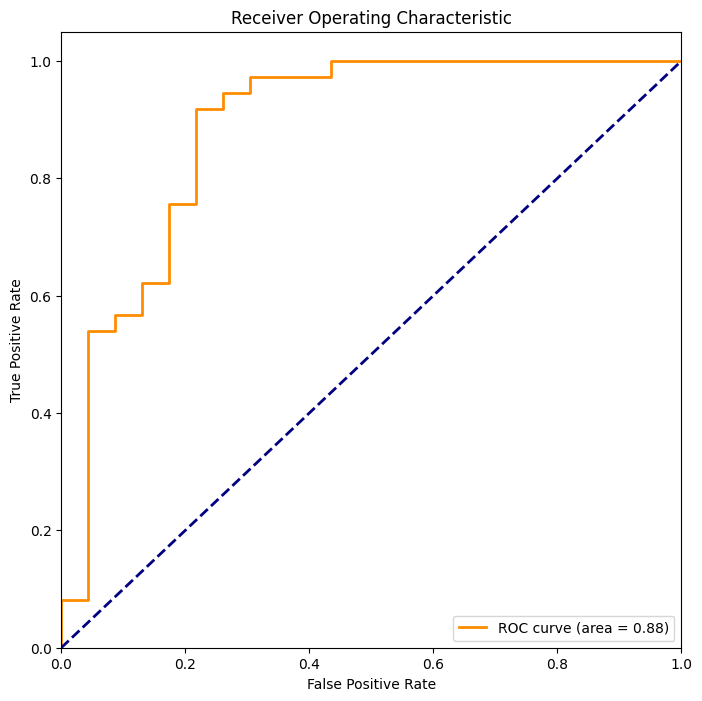

In [65]:

# Compute the probabilities of the positive class
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


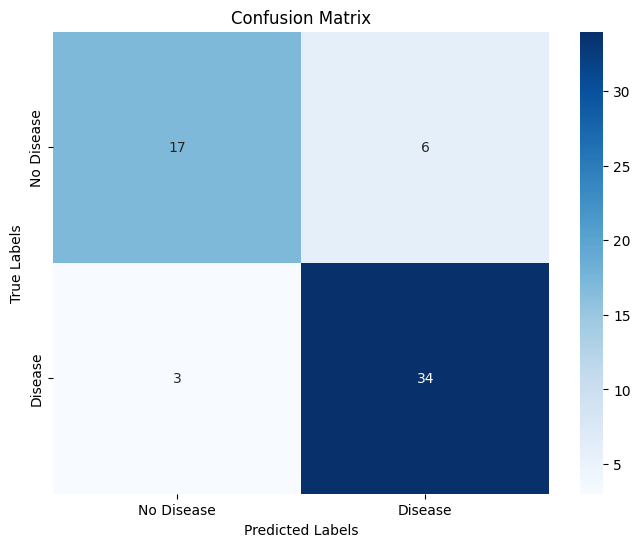

In [ ]:

# Compute the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Predicting Function**

In [67]:
def predict_user_input(model, feature_names):
    """
    Ask user to input values for each feature, make a prediction using the trained model.
    
    Args:
    - model (RandomForestClassifier): The trained Random Forest model.
    - feature_names (list): List of feature names expected by the model.
    
    Returns:
    - str: Predicted class label.
    - float: Probability of the predicted class.
    """
    import numpy as np
    import pandas as pd
    
    # Dictionary to hold user inputs
    user_data = {}
    
    # Ask user for input for each feature
    print("Please enter the following features:")
    for feature in feature_names:
        valid_input = False
        while not valid_input:
            user_input = input(f"{feature}: ")
            try:
                # Convert input to float (assuming all inputs are numeric)
                user_input = float(user_input)
                user_data[feature] = user_input
                valid_input = True
            except ValueError:
                print("Invalid input. Please enter a valid number.")
    
    # Create a DataFrame from the user inputs
    user_features_df = pd.DataFrame([user_data])
    
    # Predict the probability and class
    proba = model.predict_proba(user_features_df)[0]  # Get probabilities of each class
    predicted_class = model.predict(user_features_df)[0]  # Get predicted class
    
    # Return the class label and the probability of that class
    return predicted_class, max(proba)

# Example usage
# Assuming 'rf_classifier' is your trained RandomForestClassifier and 'X_train.columns' gives feature names
predicted_class, probability = predict_user_input(rf_classifier, list(X_train.columns))
print(f"Predicted Class: {predicted_class}, Probability: {probability:.2f}")


Please enter the following features:
Predicted Class: 1, Probability: 0.62
